# Convolutional Autoencoder 
## Mini Usecase 19


Code inspitation: https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import numpy 
import matplotlib.pyplot as plt
from tensorflow import keras 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

# Daten Laden

In [2]:
X_test = numpy.loadtxt(open("mnist_test.csv", "rb"), delimiter=",", usecols=range(1,785))
Y_test = numpy.loadtxt(open("mnist_test.csv", "rb"), delimiter=",", usecols=range(0,1))
print(X_test.shape)
X_test = X_test.reshape(10000, 28, 28)
print(X_test.shape)
print(Y_test.shape)
X_train = numpy.loadtxt(open("mnist_train.csv", "rb"), delimiter=",", usecols=range(1,785))
Y_train = numpy.loadtxt(open("mnist_train.csv", "rb"), delimiter=",", usecols=range(0,1))
print(X_train.shape)
X_train = X_train.reshape(60000, 28, 28)
print(X_train.shape)
print(Y_train.shape)

(10000, 784)
(10000, 28, 28)
(10000,)
(60000, 784)
(60000, 28, 28)
(60000,)


# Daten formatieren für Keras

In [3]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Rauschen einfügen

In [4]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

2022-02-25 09:51:40.405384: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-25 09:51:40.430756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-25 09:51:40.431094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2022-02-25 09:51:40.431254: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/o

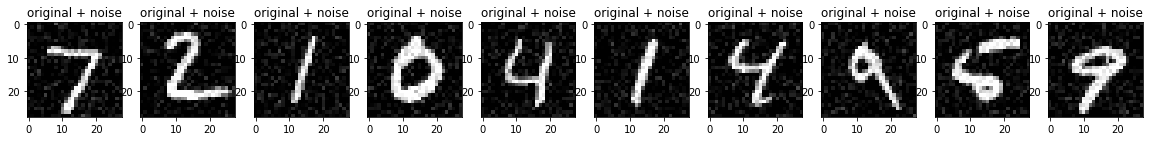

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

# Encoder - Decoder Network

In [6]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      #layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])
      layers.Conv2D(1, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      #layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(1, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [7]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0376 - val_loss: 0.0234
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0201 - val_loss: 0.0197
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0200 - val_loss: 0.0197
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0198 - val_loss: 0.0194
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0197 - val_loss: 0.0194
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [9]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 1)           145       
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran multiple                  10        
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr multiple                  160       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  145       
Total params: 315
Trainable params: 

In [10]:

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

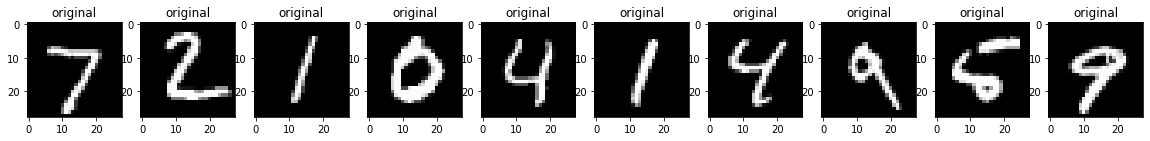

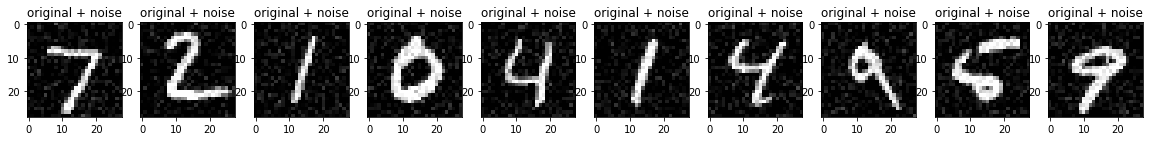

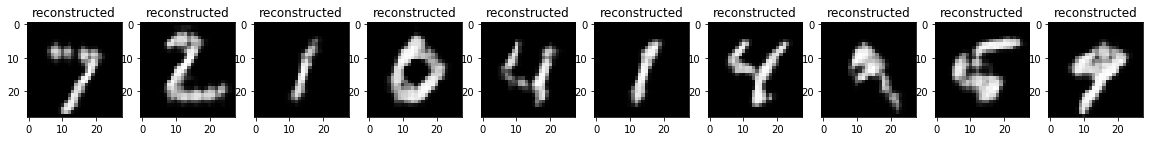

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
plt.show()


# Visualisation

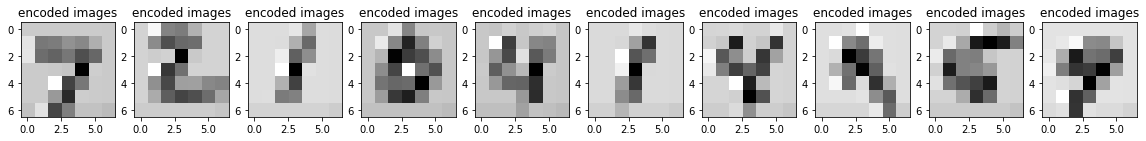

In [12]:
# Visu if last dimension is 2 dim
if (True):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.title("encoded images")
        plt.imshow(tf.squeeze(encoded_imgs[i]))
        plt.gray()
    plt.show()

(10000, 7, 7, 1)
(10000, 49)


/home/moritz/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/moritz/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


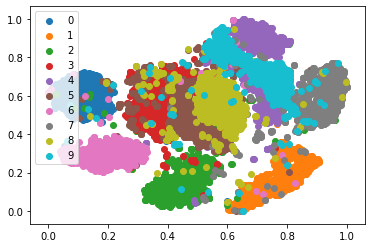

In [13]:
# https://learnopencv.com/t-sne-for-feature-visualization/
colors_per_class = [0,1,2,3,4,5,6,7,8,9]
labels = Y_test
from sklearn.manifold import TSNE

encoded_imgs_1d = encoded_imgs.reshape(10000,encoded_imgs.shape[1]*encoded_imgs.shape[2]*encoded_imgs.shape[3])
print(encoded_imgs.shape)
print(encoded_imgs_1d.shape)


tsne = TSNE(n_components=2).fit_transform(encoded_imgs_1d)


# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)

# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()


In [14]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_test.reshape(10000, 28 * 28))
fig = px.scatter(components, x=0, y=1)
fig.show()